In [1]:
import os
import pandas as pd
import numpy as np
import joblib
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm import tqdm
def generate_box(obj):
    xmin = int(obj.find("xmin").text)
    ymin = int(obj.find("ymin").text)
    xmax = int(obj.find("xmax").text)
    ymax = int(obj.find("ymax").text)
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

anno_folder = "../data/kaggle/annotations/"


In [2]:
# kaggle data exploration

In [3]:
anno_paths = sorted(list(paths.list_files(anno_folder)))
anno_paths = [ap for ap in anno_paths if ap.endswith(".xml")]
print(len(anno_paths))


853


In [4]:
obj_list = []
labels = []
boxes = []
widths = []
heights = []


In [6]:
len(boxes)


4072

distribution of widths and heights for face area box
/Users/ydkim/anaconda3/envs/cis522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

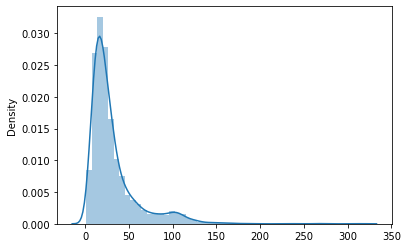

In [8]:
print('distribution of widths and heights for face area box')
sns.distplot(widths)


/Users/ydkim/anaconda3/envs/cis522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

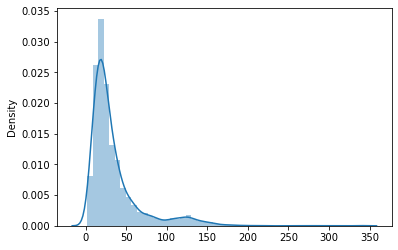

In [9]:
sns.distplot(heights)


In [10]:
len([i for i in heights if i > 100])


276

In [11]:
len([i for i in widths if i > 100])


176

In [12]:
from PIL import Image, ImageDraw


In [13]:
anno_path

'../data/kaggle/annotations/maksssksksss99.xml'

In [14]:
filenames = []
labels = []
boxes = []
widths = []
heights = []
# no mask: 52
# len([lb for lb in labels if lb == 0])

for i, anno_path in tqdm(enumerate(anno_paths), total=len(anno_paths)):
    with open(anno_path) as f:
        data = f.read()
        soup = BeautifulSoup(data, "xml")
        objects = soup.find_all("object")
        filename = anno_path.split('/')[-1]
        for obj in objects:
            box = generate_box(obj)
            box_width = box[2] - box[0]
            box_height = box[3] - box[1]
            filenames.append(filename)
            widths.append(box_width)
            heights.append(box_height)
            labels.append(generate_label(obj))
            boxes.append(box)



100%|██████████| 853/853 [00:03<00:00, 249.33it/s]


In [15]:
filename_array = np.asarray(filenames)


In [16]:
filename_array

array(['maksssksksss0.xml', 'maksssksksss0.xml', 'maksssksksss0.xml', ...,
       'maksssksksss99.xml', 'maksssksksss99.xml', 'maksssksksss99.xml'],
      dtype='<U19')

In [17]:
len([i for i in heights if i >= 100])


280

In [18]:
len([i for i in widths if i >= 100])


186

In [19]:
filename_array[heights >= 100]


TypeError: '>=' not supported between instances of 'list' and 'int'

In [21]:
height_array = np.asarray(heights)


In [23]:
img_paths = sorted(list(paths.list_images(img_folder)))


NameError: name 'img_folder' is not defined

In [24]:
img_folder = "../data/kaggle/images/"


In [25]:
img_paths = sorted(list(paths.list_images(img_folder)))


In [26]:
import re


In [27]:
filename

'maksssksksss99.xml'

In [28]:
anno_path

'../data/kaggle/annotations/maksssksksss99.xml'

In [29]:
re.find(r'.+\/(.+)\.xml', anno_path)

AttributeError: module 're' has no attribute 'find'

In [30]:
re.match(r'.+\/(.+)\.xml', anno_path)

<re.Match object; span=(0, 45), match='../data/kaggle/annotations/maksssksksss99.xml'>

In [31]:
re.match(r'.+\/(.+)\.xml', anno_path)[1]


'maksssksksss99'

In [32]:
imgids = []
labels = []
boxes = []
widths = []
heights = []
# no mask: 52
# len([lb for lb in labels if lb == 0])

for i, anno_path in tqdm(enumerate(anno_paths), total=len(anno_paths)):
    with open(anno_path) as f:
        data = f.read()
        soup = BeautifulSoup(data, "xml")
        objects = soup.find_all("object")
        imgid = re.match(r'.+\/(.+)\.xml', anno_path)[1]
        for obj in objects:
            box = generate_box(obj)
            box_width = box[2] - box[0]
            box_height = box[3] - box[1]
            imgids.append(imgid)
            widths.append(box_width)
            heights.append(box_height)
            labels.append(generate_label(obj))
            boxes.append(box)



100%|██████████| 853/853 [00:03<00:00, 261.23it/s]


In [36]:
imgid_array = np.asarray(imgids)
height_array = np.asarray(heights)
filtered_img = imgid_array[height_array >= 100]


In [37]:
img_path = img_folder + imgid[0] + '.png'


In [39]:
img_path = img_folder + filtered_img[0] + '.png'


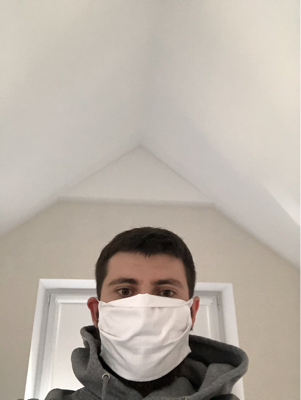

In [40]:
Image.open(img_path)

In [41]:
kaggle_dict = {
'id':imgids, 
'label':labels, 
'box':boxes, 
'width':widths, 
'height':heights, 
}

kaggle_df = pd.DataFrame.from_dict(kaggle_dict)


In [42]:
kaggle_df

,id,label,box,width,height
0,maksssksksss0,0,"[79, 105, 109, 142]",30,37
1,maksssksksss0,1,"[185, 100, 226, 144]",41,44
2,maksssksksss0,0,"[325, 90, 360, 141]",35,51
3,maksssksksss1,1,"[321, 34, 354, 69]",33,35
4,maksssksksss1,1,"[224, 38, 261, 73]",37,35
...,...,...,...,...,...
4067,maksssksksss98,1,"[263, 62, 287, 85]",24,23
4068,maksssksksss98,1,"[344, 80, 377, 106]",33,26
4069,maksssksksss99,2,"[181, 54, 273, 162]",92,108
4070,maksssksksss99,1,"[99, 87, 176, 165]",77,78


In [43]:
len(kaggle_dfV)


NameError: name 'kaggle_dfV' is not defined

In [44]:
len(kaggle_df)


4072

/Users/ydkim/anaconda3/envs/cis522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

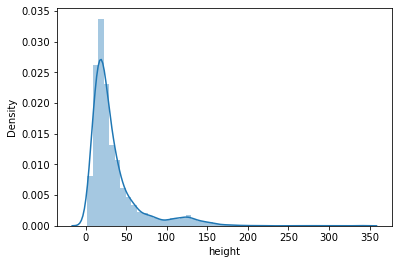

In [45]:
sns.distplot(kaggle_df['height'])


/Users/ydkim/anaconda3/envs/cis522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='width', ylabel='Density'>

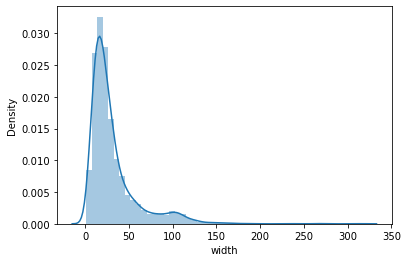

In [46]:
sns.distplot(kaggle_df['width'])


In [47]:
filtered = kaggle_df[kaggle_df['height'] >= 100]


In [48]:
filtered

,id,label,box,width,height
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159
...,...,...,...,...,...
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111
4069,maksssksksss99,2,"[181, 54, 273, 162]",92,108


In [49]:
temp = filtered['id'].iloc[0]


In [50]:
img_path = img_folder + temp + '.png'


In [52]:
temp = filtered.iloc[0]['id']


In [54]:
im = Image.open(img_path) 


In [56]:
d = ImageDraw.Draw(im, "RGBA")
d.line(temp['box'],fill=(150, 0, 0, 180), width=2)


In [59]:
temp['box']

[98, 267, 194, 383]

In [62]:
box_path = [
    [box[0], box[1]],
    [box[0], box[3]],
    [box[2], box[3]],
    [box[2], box[1]],
]



In [64]:
box_path = [(box[0], box[1]), (box[0], box[3]), (box[2], box[3]), (box[2], box[1])]
d = ImageDraw.Draw(im, "RGBA")
d.line(box_path, fill=(150, 0, 0, 180), width=2)


In [66]:
im = Image.open(img_path)
box = temp["box"]
box_path = [
    (box[0], box[1]),
    (box[0], box[3]),
    (box[2], box[3]),
    (box[2], box[1]),
    (box[0], box[1]),
]

d = ImageDraw.Draw(im, "RGBA")
d.line(box_path, fill=(150, 0, 0, 180), width=2)


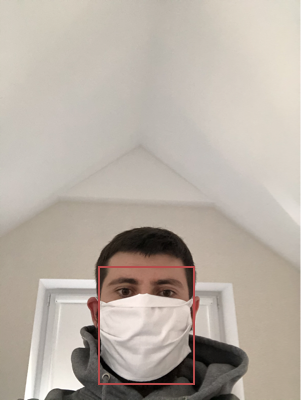

In [67]:
im

In [68]:
box[1]

267

In [69]:
box[3]

383

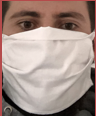

In [70]:
im.crop(box)

In [71]:
im.width


301

In [72]:
im.height


400

In [73]:
box

[98, 267, 194, 383]

In [74]:
box + [1, 2, 3, 4]

[98, 267, 194, 383, 1, 2, 3, 4]

In [75]:
np.asarray(box) + [1, 2, 3, 4]

array([ 99, 269, 197, 387])

In [76]:
newbox = np.asarray(box) + np.asarray([1, 2, 3, 4])


In [77]:
newbox

array([ 99, 269, 197, 387])

In [78]:
newsize = 250
width = temp['width']
offset_w = int(newsize - width) / 2


In [79]:
offset_w

77.0

In [80]:
offset_w = int(newsize - width / 2)


In [81]:
offset_w

202

In [82]:
offset_w = int((newsize - width) / 2)


In [83]:
offset_w

77

In [84]:
offset_w = int((newsize - width+1) / 2)


In [85]:
offset_w

77

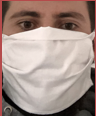

In [86]:
im.crop(box)

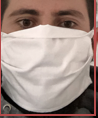

In [87]:
im.crop(newbox)

In [88]:
newbox = np.asarray(box) + np.asarray([100, 100, 100, 100])


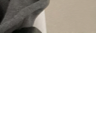

In [89]:
im.crop(newbox)

In [90]:
newsize = 250
width = temp["width"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_bot = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == 0:
    limit_left = max(limit_left - (im.width - pos_right), 0)

if limit_bot == 0:
    limit_top = max(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)


NameError: name 'height' is not defined

In [91]:
newsize = 250
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_bot = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == 0:
    limit_left = max(limit_left - (im.width - pos_right), 0)

if limit_bot == 0:
    limit_top = max(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)


NameError: name 'limit_top' is not defined

In [92]:
newsize = 250
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_bot = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_top = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == 0:
    limit_left = max(limit_left - (im.width - pos_right), 0)

if limit_bot == 0:
    limit_top = max(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)


ValueError: Could not save to PNG for display

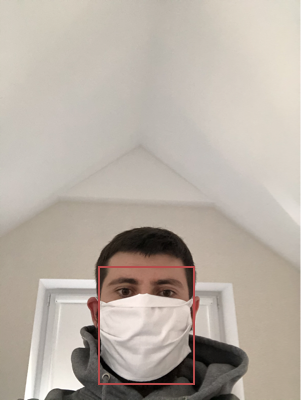

In [93]:
im

In [94]:
newbox

[21, 400, 271, 200]

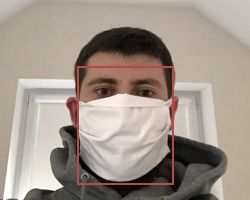

In [95]:
newsize = 250
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == 0:
    limit_left = max(limit_left - (im.width - pos_right), 0)

if limit_bot == 0:
    limit_top = max(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)


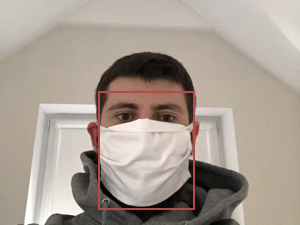

In [96]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == 0:
    limit_left = max(limit_left - (im.width - pos_right), 0)

if limit_bot == 0:
    limit_top = max(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)


In [97]:
im.crop(newbox).size


(300, 225)

In [98]:
pos_top

175

In [99]:
limit_top

175

In [100]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = max(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = max(limit_bot - pos_top, im.height)

if limit_right == 0:
    limit_left = min(limit_left - (im.width - pos_right), 0)

if limit_bot == 0:
    limit_top = min(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]


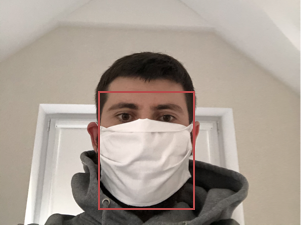

In [101]:
im.crop(newbox)


In [102]:
im.crop(newbox).size


(301, 225)

In [103]:
limit_right

301

In [104]:
limit_left

0

In [105]:
limit_top

175

In [106]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)


In [107]:
limit_top

175

In [108]:
limit_bot = min(im.height, pos_bot)


In [109]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = max(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = max(limit_bot - pos_top, im.height)

if limit_right == im.width:
    limit_left = min(limit_left - (im.width - pos_right), 0)

if limit_bot == im.height:
    limit_top = min(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)
im.crop(newbox).size


(306, 400)

In [111]:
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == im.width:
    limit_left = max(limit_left - (im.width - pos_right), 0)

if limit_bot == im.height:
    limit_top = max(limit_top - (im.height - pos_bot), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)
im.crop(newbox).size


(300, 150)

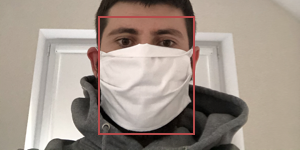

In [112]:
im.crop(newbox)


In [113]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)


In [114]:
limit_top

175

In [115]:
im.height - pos_bot

-75

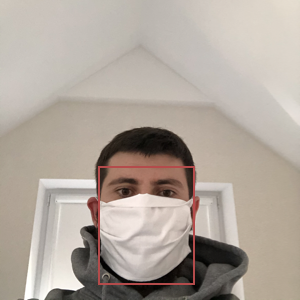

In [116]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == im.width:
    limit_left = max(limit_left - (pos_right - im.width), 0)

if limit_bot == im.height:
    limit_top = max(limit_top - (pos_bot - im.height), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)


In [117]:
im.crop(newbox).size


(300, 300)

In [118]:
temp = filtered.iloc[1]
img_path = img_folder + temp["id"] + ".png"
im = Image.open(img_path)


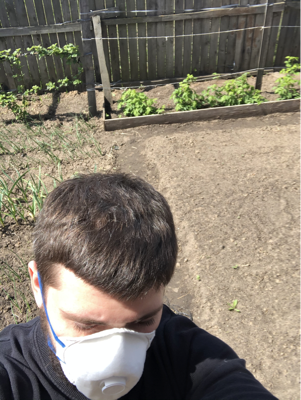

In [119]:
im

In [120]:
box = temp["box"]
box_path = [
    (box[0], box[1]),
    (box[0], box[3]),
    (box[2], box[3]),
    (box[2], box[1]),
    (box[0], box[1]),
]

d = ImageDraw.Draw(im, "RGBA")
d.line(box_path, fill=(150, 0, 0, 180), width=2)


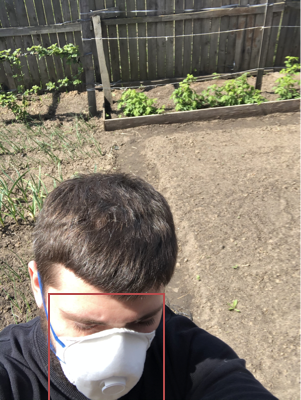

In [121]:
im

In [122]:
newsize = 300
width = temp["width"]
height = temp["height"]
offset_w = int((newsize - width) / 2)
offset_h = int((newsize - height) / 2)
pos_left = box[0] - offset_w
pos_top = box[1] - offset_h
pos_right = box[2] + offset_w
pos_bot = box[3] + offset_h
limit_left = max(0, pos_left)
limit_top = max(0, pos_top)
limit_right = min(im.width, pos_right)
limit_bot = min(im.height, pos_bot)
if limit_left == 0:
    limit_right = min(limit_right - pos_left, im.width)

if limit_top == 0:
    limit_bot = min(limit_bot - pos_top, im.height)

if limit_right == im.width:
    limit_left = max(limit_left - (pos_right - im.width), 0)

if limit_bot == im.height:
    limit_top = max(limit_top - (pos_bot - im.height), 0)

newbox = [limit_left, limit_top, limit_right, limit_bot]
im.crop(newbox)
im.crop(newbox).size


(300, 300)

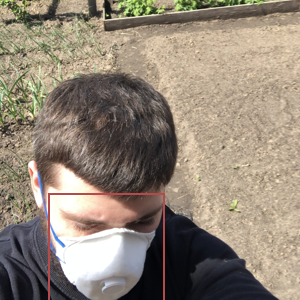

In [124]:
im.crop(newbox)


In [125]:
im = im.crop(newbox)


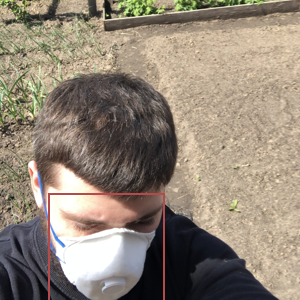

In [126]:
im

In [127]:
def crop_face(temp, newsize):
    box = temp["box"]
    width = temp["width"]
    height = temp["height"]
    img_id = temp["id"]
    if width < newsize or height < newsize:
        print(f"{img_id} is too small")
        return (np.nan, 0)
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        offset_w = int((newsize - width) / 2)
        offset_h = int((newsize - height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (img_np, img_dim)



In [128]:
def crop_face(temp, newsize):
    box = temp["box"]
    width = temp["width"]
    height = temp["height"]
    img_id = temp["id"]
    if width < newsize or height < newsize:
        print(f"{img_id} is too small")
        return (np.nan, np.nan, 0)
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        offset_w = int((newsize - width) / 2)
        offset_h = int((newsize - height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (im, img_np, img_dim)



In [129]:
def crop_face(data, newsize):
    box = data["box"]
    width = data["width"]
    height = data["height"]
    img_id = data["id"]
    if width < newsize or height < newsize:
        print(f"{img_id} is too small")
        return (np.nan, np.nan, 0)
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        offset_w = int((newsize - width) / 2)
        offset_h = int((newsize - height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (im, img_np, img_dim)



In [130]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    width = datarow["width"]
    height = datarow["height"]
    img_id = datarow["id"]
    if width < newsize or height < newsize:
        print(f"{img_id} is too small")
        return (np.nan, np.nan, 0)
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        offset_w = int((newsize - width) / 2)
        offset_h = int((newsize - height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (im, img_np, img_dim)



In [131]:
crop_face(filtered.iloc[2])[0]

TypeError: crop_face() missing 1 required positional argument: 'newsize'

In [132]:
crop_face(filtered.iloc[2], 300)[0]

maksssksksss106 is too small


nan

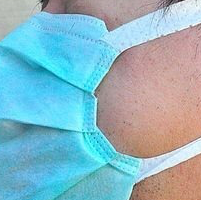

In [133]:
crop_face(filtered.iloc[2], 200)[0]

In [134]:
crop_face(filtered.iloc[2], 300)[0]

maksssksksss106 is too small


nan

In [135]:
crop_face(filtered.iloc[3], 300)[0]

maksssksksss107 is too small


nan

In [136]:
crop_face(filtered.iloc[3], 200)[0]

maksssksksss107 is too small


nan

In [137]:
crop_face(filtered.iloc[4], 200)[0]

maksssksksss109 is too small


nan

In [138]:
crop_face(filtered.iloc[5], 200)[0]

maksssksksss117 is too small


nan

In [139]:
crop_face(filtered.iloc[6], 200)[0]

maksssksksss120 is too small


nan

In [140]:
crop_face(filtered.iloc[1], 200)[0]

maksssksksss101 is too small


nan

In [141]:
crop_face(filtered.iloc[0], 200)[0]

maksssksksss10 is too small


nan

In [142]:
filtered.iloc[0]

id             maksssksksss10
label                       1
box       [98, 267, 194, 383]
width                      96
height                    116
Name: 12, dtype: object

In [143]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    width = datarow["width"]
    height = datarow["height"]
    img_id = datarow["id"]
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        if im.width < newsize or im.height < newsize:
            print(f"{img_id} is too small")
            return (np.nan, np.nan, 0)
        offset_w = int((newsize - width) / 2)
        offset_h = int((newsize - height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (im, img_np, img_dim)



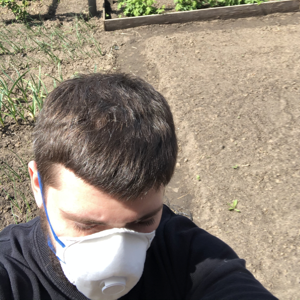

In [144]:
crop_face(filtered.iloc[1], 300)[0]

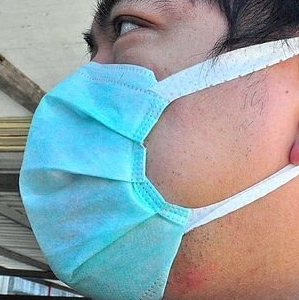

In [145]:
crop_face(filtered.iloc[2], 300)[0]

In [146]:
filtered.iloc[2]

id            maksssksksss106
label                       1
box       [154, 51, 423, 391]
width                     269
height                    340
Name: 39, dtype: object

In [147]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    box_width = datarow["width"]
    box_height = datarow["height"]
    img_id = datarow["id"]
    if box_width > newsize:
        newsize == box_width
    elif box_height > newsize:
        newsize == box_height
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        if im.width < newsize or im.height < newsize:
            print(f"{img_id} is too small")
            return (np.nan, np.nan, 0)
        offset_w = int((newsize - box_width) / 2)
        offset_h = int((newsize - box_height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (im, img_np, img_dim)



In [149]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    box_width = datarow["width"]
    box_height = datarow["height"]
    img_id = datarow["id"]
    if box_width > newsize:
        newsize = box_width
    elif box_height > newsize:
        newsize = box_height
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        if im.width < newsize or im.height < newsize:
            print(f"{img_id} is too small")
            return (np.nan, np.nan, 0)
        offset_w = int((newsize - box_width) / 2)
        offset_h = int((newsize - box_height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        img_np = np.array(im)
        img_dim = im.size
    return (im, img_np, img_dim)



In [153]:
filtered


,id,label,box,width,height
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159
...,...,...,...,...,...
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111
4069,maksssksksss99,2,"[181, 54, 273, 162]",92,108


In [154]:
filtered.pivot_table(index='label', aggfunc=len)

,box,height,id,width
label,,,,
0,51,51,51,51
1,219,219,219,219
2,10,10,10,10


In [155]:
newsize = 300
cropped = []
for idx, row in filtered.iterrows():
    cropped.append(crop_face(row), newsize)



TypeError: crop_face() missing 1 required positional argument: 'newsize'

In [158]:
filtered = kaggle_df[kaggle_df["height"] >= 80]


In [159]:
filtered.pivot_table(index='label', aggfunc=len)

,box,height,id,width
label,,,,
0,57,57,57,57
1,300,300,300,300
2,14,14,14,14


In [160]:
kaggle_df

,id,label,box,width,height
0,maksssksksss0,0,"[79, 105, 109, 142]",30,37
1,maksssksksss0,1,"[185, 100, 226, 144]",41,44
2,maksssksksss0,0,"[325, 90, 360, 141]",35,51
3,maksssksksss1,1,"[321, 34, 354, 69]",33,35
4,maksssksksss1,1,"[224, 38, 261, 73]",37,35
...,...,...,...,...,...
4067,maksssksksss98,1,"[263, 62, 287, 85]",24,23
4068,maksssksksss98,1,"[344, 80, 377, 106]",33,26
4069,maksssksksss99,2,"[181, 54, 273, 162]",92,108
4070,maksssksksss99,1,"[99, 87, 176, 165]",77,78


In [161]:
filtered

,id,label,box,width,height
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159
...,...,...,...,...,...
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128
4035,maksssksksss91,1,"[290, 101, 342, 185]",52,84
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111
4069,maksssksksss99,2,"[181, 54, 273, 162]",92,108


In [162]:
filtered = kaggle_df[kaggle_df["label"] != 2]
filtered = kaggle_df[kaggle_df["height"] >= 80]


In [163]:
filtered = kaggle_df[kaggle_df["label"] != 2]
filtered = filtered[filtered["height"] >= 80]


In [164]:
len(filtered)

357

In [165]:
crop_face(filtered.iloc[-1],300)

maksssksksss99 is too small


(nan, nan, 0)

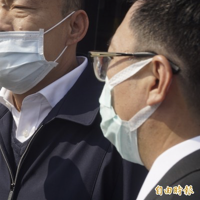

In [167]:
crop_face(filtered.iloc[-1],200)[0]

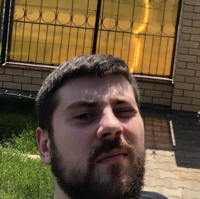

In [168]:
crop_face(filtered.iloc[-2],200)[0]

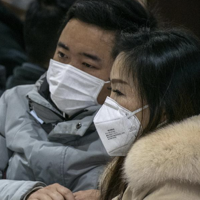

In [169]:
crop_face(filtered.iloc[-3],200)[0]

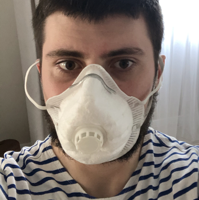

In [170]:
crop_face(filtered.iloc[-4],200)[0]

In [172]:
len(filtered['id'].unique())

323

In [173]:
filtered[filtered['height'].duplicated(keep=False)]


,id,label,box,width,height
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120
107,maksssksksss114,1,"[80, 58, 153, 141]",73,83
122,maksssksksss117,1,"[131, 224, 227, 346]",96,122
...,...,...,...,...,...
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128
4035,maksssksksss91,1,"[290, 101, 342, 185]",52,84
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111


In [174]:
filtered = filtered[filtered["height"] >= 80]


In [175]:
filtered[filtered['label'].duplicated(keep=False)]


,id,label,box,width,height
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159
...,...,...,...,...,...
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128
4035,maksssksksss91,1,"[290, 101, 342, 185]",52,84
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111


In [176]:
filtered = kaggle_df[kaggle_df["label"] != 2]
filtered = filtered[filtered["height"] >= 80]
filtered = filtered[filtered['label'].duplicated(keep=False)]


In [177]:
len(filtered)

357

In [178]:
filtered.pivot_table(index='label', aggfunc=len)

,box,height,id,width
label,,,,
0,57,57,57,57
1,300,300,300,300


In [179]:
save_folder = "../data/kaggle/cropped/"


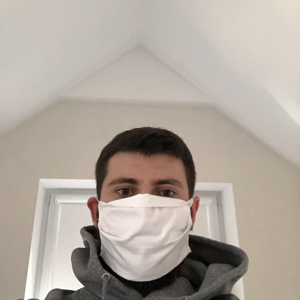

In [180]:
crop_face(filtered.iloc[0], 300)[0]

In [181]:
new_img = crop_face(filtered.iloc[0], 300)[0]


In [182]:
save_path = save_folder + img_id + '.jpg'
new_img.save(save_path, 'JPEG')


NameError: name 'img_id' is not defined

In [183]:
img_id = 'temp'
save_path = save_folder + img_id + '.jpg'
new_img.save(save_path, 'JPEG')


OSError: cannot write mode RGBA as JPEG

In [184]:
new_img.save(save_path, '.png')


KeyError: '.PNG'

In [185]:
new_img.save(save_path, '.PNG')


KeyError: '.PNG'

In [186]:
new_img = new_img.convert('RGB')


In [187]:
new_img.save(save_path, '.PNG')


KeyError: '.PNG'

In [188]:
new_img.save(save_path, '.JPEG')


KeyError: '.JPEG'

In [189]:
new_img.save(save_path, 'JPEG')


In [190]:
newsize = 300
dim_list = []
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    new_img = new_img.convert('RGB')
    img_id = row['id'] 
    label_str = 'cw_' if row['label'] == 1 else 'nm_'
    save_path = save_folder + label_str + img_id + '.jpg'
    new_img.save(save_path, 'JPEG')
    dim_list.append(img_dim)



ValueError: too many values to unpack (expected 2)

In [191]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    box_width = datarow["width"]
    box_height = datarow["height"]
    img_id = datarow["id"]
    if box_width > newsize:
        newsize = box_width
    elif box_height > newsize:
        newsize = box_height
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        if im.width < newsize or im.height < newsize:
            print(f"{img_id} is too small")
            return (np.nan, np.nan, 0)
        offset_w = int((newsize - box_width) / 2)
        offset_h = int((newsize - box_height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        # img_np = np.array(im)
        img_dim = im.size
    return (im, img_dim)



In [192]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    box_width = datarow["width"]
    box_height = datarow["height"]
    img_id = datarow["id"]
    if box_width > newsize:
        newsize = box_width
    elif box_height > newsize:
        newsize = box_height
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        if im.width < newsize or im.height < newsize:
            print(f"{img_id} is too small")
            return (np.nan, 0)
        offset_w = int((newsize - box_width) / 2)
        offset_h = int((newsize - box_height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        # img_np = np.array(im)
        img_dim = im.size
    return (im, img_dim)



In [193]:
im.size

(300, 300)

In [194]:
def crop_face(datarow, newsize):
    box = datarow["box"]
    box_width = datarow["width"]
    box_height = datarow["height"]
    img_id = datarow["id"]
    if box_width > newsize:
        newsize = box_width
    elif box_height > newsize:
        newsize = box_height
    img_path = img_folder + img_id + ".png"
    with Image.open(img_path) as im:
        if im.width < newsize or im.height < newsize:
            print(f"{img_id} is too small")
            return (np.nan, (0,0))
        offset_w = int((newsize - box_width) / 2)
        offset_h = int((newsize - box_height) / 2)
        pos_left = box[0] - offset_w
        pos_top = box[1] - offset_h
        pos_right = box[2] + offset_w
        pos_bot = box[3] + offset_h
        # calculate border positions
        limit_left = max(0, pos_left)
        limit_top = max(0, pos_top)
        limit_right = min(im.width, pos_right)
        limit_bot = min(im.height, pos_bot)
        # if one side is oob, compensate on the other side
        if limit_left == 0:
            limit_right = min(limit_right - pos_left, im.width)
        elif limit_right == im.width:
            limit_left = max(limit_left - (pos_right - im.width), 0)
        if limit_top == 0:
            limit_bot = min(limit_bot - pos_top, im.height)
        elif limit_bot == im.height:
            limit_top = max(limit_top - (pos_bot - im.height), 0)
        newbox = [limit_left, limit_top, limit_right, limit_bot]
        im = im.crop(newbox)
        # img_np = np.array(im)
        img_dim = im.size
    return (im, img_dim)



In [195]:
newsize = 300
dim_list = []
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    if not np.isnan(new_img):
        new_img = new_img.convert("RGB")
        img_id = row["id"]
        label_str = "cw_" if row["label"] == 1 else "nm_"
        save_path = save_folder + label_str + img_id + ".jpg"
        new_img.save(save_path, "JPEG")
    dim_list.append(img_dim)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [196]:
newsize = 300
dim_list = []
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    if new_img:
        new_img = new_img.convert("RGB")
        img_id = row["id"]
        label_str = "cw_" if row["label"] == 1 else "nm_"
        save_path = save_folder + label_str + img_id + ".jpg"
        new_img.save(save_path, "JPEG")
    dim_list.append(img_dim)



maksssksksss114 is too small


AttributeError: 'float' object has no attribute 'convert'

In [197]:
newsize = 300
dim_list = []
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    if img_dim != (0, 0):
        new_img = new_img.convert("RGB")
        img_id = row["id"]
        label_str = "cw_" if row["label"] == 1 else "nm_"
        save_path = save_folder + label_str + img_id + ".jpg"
        new_img.save(save_path, "JPEG")
    dim_list.append(img_dim)



maksssksksss114 is too small
maksssksksss122 is too small
maksssksksss126 is too small
maksssksksss135 is too small
maksssksksss138 is too small
maksssksksss138 is too small
maksssksksss140 is too small
maksssksksss140 is too small
maksssksksss155 is too small
maksssksksss160 is too small
maksssksksss168 is too small
maksssksksss170 is too small
maksssksksss190 is too small
maksssksksss198 is too small
maksssksksss207 is too small
maksssksksss208 is too small
maksssksksss208 is too small
maksssksksss21 is too small
maksssksksss22 is too small
maksssksksss244 is too small
maksssksksss252 is too small
maksssksksss269 is too small
maksssksksss269 is too small
maksssksksss274 is too small
maksssksksss282 is too small
maksssksksss285 is too small
maksssksksss295 is too small
maksssksksss298 is too small
maksssksksss298 is too small
maksssksksss307 is too small
maksssksksss317 is too small
maksssksksss321 is too small
maksssksksss329 is too small
maksssksksss347 is too small
maksssksksss349 

In [198]:
len(dim_list)

357

In [199]:
filtered['cropped_dim'] = dim_list

In [200]:
filtered

,id,label,box,width,height,cropped_dim
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116,"(300, 300)"
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106,"(300, 300)"
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340,"(339, 340)"
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120,"(299, 300)"
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159,"(300, 299)"
...,...,...,...,...,...,...
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103,"(300, 299)"
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128,"(299, 300)"
4035,maksssksksss91,1,"[290, 101, 342, 185]",52,84,"(0, 0)"
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111,"(300, 299)"


In [201]:
filtered['cropped_dim'] = dim_list


In [203]:
filtered[filtered['cropped_dim'] != (0,0)].pivot_table(index="label", aggfunc=len)


,box,cropped_dim,height,id,width
label,,,,,
0,51,51,51,51,51
1,210,210,210,210,210


In [204]:
filtered = kaggle_df[kaggle_df["label"] != 2]
# face should be large enough

filtered = filtered[filtered["height"] >= 60]
# photograph should contain only one person

filtered = filtered[filtered["label"].duplicated(keep=False)]
filtered.pivot_table(index="label", aggfunc=len)
newsize = 250
dim_list = []


In [205]:
filtered = kaggle_df[kaggle_df["label"] != 2]
# face should be large enough

filtered = filtered[filtered["height"] >= 80]
# photograph should contain only one person

filtered = filtered[filtered["label"].duplicated(keep=False)]


In [206]:
newsize = 300
dim_list = []
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    # if img_dim != (0, 0):
    #     new_img = new_img.convert("RGB")
    #     img_id = row["id"]
    #     label_str = "cw_" if row["label"] == 1 else "nm_"
    #     save_path = save_folder + label_str + img_id + ".jpg"
    #     new_img.save(save_path, "JPEG")
    dim_list.append(img_dim)

filtered["cropped_dim"] = dim_list


maksssksksss114 is too small
maksssksksss122 is too small
maksssksksss126 is too small
maksssksksss135 is too small
maksssksksss138 is too small
maksssksksss138 is too small
maksssksksss140 is too small
maksssksksss140 is too small
maksssksksss155 is too small
maksssksksss160 is too small
maksssksksss168 is too small
maksssksksss170 is too small
maksssksksss190 is too small
maksssksksss198 is too small
maksssksksss207 is too small
maksssksksss208 is too small
maksssksksss208 is too small
maksssksksss21 is too small
maksssksksss22 is too small
maksssksksss244 is too small
maksssksksss252 is too small
maksssksksss269 is too small
maksssksksss269 is too small
maksssksksss274 is too small
maksssksksss282 is too small
maksssksksss285 is too small
maksssksksss295 is too small
maksssksksss298 is too small
maksssksksss298 is too small
maksssksksss307 is too small
maksssksksss317 is too small
maksssksksss321 is too small
maksssksksss329 is too small
maksssksksss347 is too small
maksssksksss349 

In [207]:
filtered

,id,label,box,width,height,cropped_dim
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116,"(300, 300)"
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106,"(300, 300)"
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340,"(339, 340)"
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120,"(299, 300)"
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159,"(300, 299)"
...,...,...,...,...,...,...
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103,"(300, 299)"
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128,"(299, 300)"
4035,maksssksksss91,1,"[290, 101, 342, 185]",52,84,"(0, 0)"
4059,maksssksksss95,0,"[67, 289, 155, 400]",88,111,"(300, 299)"


In [208]:
filtered.to_pickle('kaggle_v1.pickle')

In [210]:
v1 = filtered[filtered['cropped_dim']!= (0,0)]

In [211]:
v1

,id,label,box,width,height,cropped_dim
12,maksssksksss10,1,"[98, 267, 194, 383]",96,116,"(300, 300)"
16,maksssksksss101,1,"[48, 294, 164, 400]",116,106,"(300, 300)"
39,maksssksksss106,1,"[154, 51, 423, 391]",269,340,"(339, 340)"
40,maksssksksss107,1,"[121, 192, 212, 312]",91,120,"(299, 300)"
46,maksssksksss109,1,"[216, 92, 372, 251]",156,159,"(300, 299)"
...,...,...,...,...,...,...
3950,maksssksksss845,1,"[101, 197, 180, 306]",79,109,"(299, 299)"
3983,maksssksksss851,1,"[66, 205, 156, 330]",90,125,"(300, 299)"
3990,maksssksksss87,1,"[129, 284, 211, 387]",82,103,"(300, 299)"
3991,maksssksksss88,1,"[42, 176, 151, 304]",109,128,"(299, 300)"


In [212]:
v1_list = v1['id']


In [213]:
filtered = kaggle_df[kaggle_df["label"] != 2]
# face should be large enough

filtered = filtered[filtered["height"] >= 60]
# photograph should contain only one person

filtered = filtered[filtered["label"].duplicated(keep=False)]
filtered.pivot_table(index="label", aggfunc=len)
newsize = 200
dim_list = []


In [214]:
filtered = kaggle_df[kaggle_df["label"] != 2]
# face should be large enough

filtered = filtered[filtered["height"] >= 60]
# photograph should contain only one person

filtered = filtered[filtered["label"].duplicated(keep=False)]
# TEMP: filtering out data from previous iteration
# v1 = filtered[filtered["cropped_dim"] != (0, 0)]
# v1_list = v1["id"]

filtered = filtered[~filtered["id"].isin(v1_list)]
filtered.pivot_table(index="label", aggfunc=len)
newsize = 200
dim_list = []


In [215]:
len(filtered)

252

In [216]:
save_folder = "../data/kaggle/new/"


In [217]:
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    if img_dim != (0, 0):
        new_img = new_img.convert("RGB")
        img_id = row["id"]
        label_str = "cw_" if row["label"] == 1 else "nm_"
        save_path = save_folder + label_str + img_id + ".jpg"
        new_img.save(save_path, "JPEG")
    dim_list.append(img_dim)

filtered["cropped_dim"] = dim_list


maksssksksss15 is too small


In [218]:
filtered = kaggle_df[kaggle_df["label"] != 2]
# face should be large enough

filtered = filtered[filtered["height"] >= 60]
# photograph should contain only one person
# filtered = filtered[filtered["label"].duplicated(keep=False)]
# TEMP: filtering out data from previous iteration
# v1 = filtered[filtered["cropped_dim"] != (0, 0)]
# v1_list = v1["id"]
# filtered = filtered[~filtered["id"].isin(v1_list)]

filtered.pivot_table(index="label", aggfunc=len)
newsize = 200
dim_list = []
for idx, row in filtered.iterrows():
    new_img, img_dim = crop_face(row, newsize)
    if img_dim != (0, 0):
        new_img = new_img.convert("RGB")
        img_id = row["id"]
        label_str = "cw_" if row["label"] == 1 else "nm_"
        save_path = save_folder + label_str + img_id + ".jpg"
        new_img.save(save_path, "JPEG")
    dim_list.append(img_dim)

filtered["cropped_dim"] = dim_list
filtered[filtered["cropped_dim"] != (0, 0)].pivot_table(index="label", aggfunc=len)


maksssksksss15 is too small


,box,cropped_dim,height,id,width
label,,,,,
0,74,74,74,74,74
1,455,455,455,455,455


In [220]:
filtered = kaggle_df[kaggle_df["label"] != 2]
# face should be large enough

filtered = filtered[filtered["height"] >= 60]
# photograph should contain only one person

filtered = filtered[filtered["label"].duplicated(keep=False)]
# TEMP: filtering out data from previous iteration
# v1 = filtered[filtered["cropped_dim"] != (0, 0)]
# v1_list = v1["id"]
# filtered = filtered[~filtered["id"].isin(v1_list)]



In [222]:
filtered = filtered[~filtered["id"].isin(v1_list)]


In [223]:
len(filtered)

252

In [224]:
filtered.to_pickle('kaggle_v2.pickle')